In [2]:
library(tree)
library(rpart)
library(rpart.plot)
library(ggplot2)
library(rsample)      # data splitting 
library(randomForest) # basic implementation
library(ranger)       # a faster implementation of randomForest
library(caret)        # an aggregator package for performing many machine learning models
#library(h2o) 
library(e1071)

## Data

The sample was drawn in two stages. First, from the 30 largest cities and towns (representing about two-thirds of the population), author chose 150 sampling clusters at random, with the number of clusters chosen in each city or town approximately proportional to its share of the combined population of the 30 cities/towns. For each of the 150 clusters, he selected the school where students from that cluster attend 8th grade, the final year of primary school. From each school he selected 15 boys at random from a list of all currently enrolled 8th grade students. All 2250 students were administered a survey between April and May 2001, close to the end of the academic year, gathering information on a variety of individual and household characteristics, as well as some simple questions on expected earnings by education.


A second survey was conducted shortly after the beginning of the next academic term (October 2001), with respondents interviewed again about perceived returns to education and current enrolment status, as well as health-related behaviors. A third round, follow-up survey was conducted in May and June of 2005, by which time students should have been finishing their last year of secondary school; for the approximately 120 students still enrolled in 2005 but not yet in their final year of school (due primarily to grade repetition), he conducted follow-ups for the next 2 years. He was able to re-interview 94% of youths in round 2 and 89% in round 3 (though for the educational outcomes, we were able to track students administratively even if we did not interview them, which reduced attrition to 3 and 9%, respectively). Attrition rates were very similar for treatment and control youths; in round 2, he was able to re-interview 1053 of the 1125 control students and 1057 of the 1125 treatment students, and in round 3, he was able to re-interview 1006 of the controls and 1005 of the treatment sample. 

The OOB error is often claimed to be an unbiased estimator for the true error rate (Breiman;
2001; Goldstein et al.; 2011; Zhang et al.; 2010). However, for two-class classification problems
it was reported that the OOB error overestimates the true prediction error (Bylander; 2002;
Mitchell; 2011).  It was thus recommended to
use the OOB error only as an upper bound for the true prediction error (Mitchell; 2011). However,
Mitchell (2011) considered only settings with completely balanced samples, sample sizes below 60
and two response classes, limiting the generality of the results.

The size of this subset is usually referred to as mtry. In practical applications, the most common
approach for choosing appropriate values for mtry is to select the value over a grid of plausible
values which yields the smallest OOB error (Oliveira et al.; 2012; Hassane et al.; 2008; Nicodemus
et al.; 2010). Also in works on RF methodology, the OOB error has frequently been used to choose
an appropriate value for mtry (Nicodemus and Malley; 2009; Kim et al.; 2006). In principle, other
procedures like (repeated) cross-validation may be applied for selecting an optimal value for mtry,
but the OOB error is usually the first choice for parameter tuning.

It is well
known that classification trees are greatly affected by class imbalance in the sense that trees that
were trained on unbalanced samples preferentially classify new observations into the class from
which most training observations come. 

With respect to data-dependent factors, the present studies identified the response class distribution of the original sample, the predictor number, the correlation between predictors as well
as their predictive ability as relevant factors that have an effect on the bias.

## Descriptive statistics 



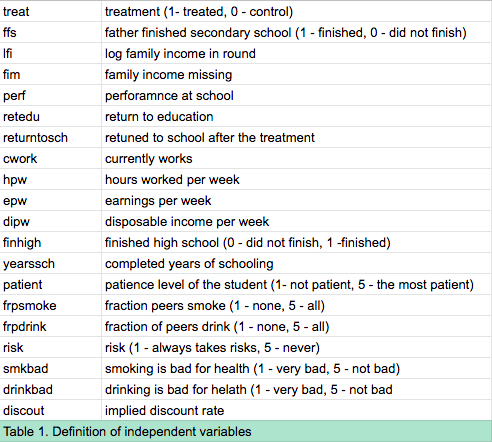

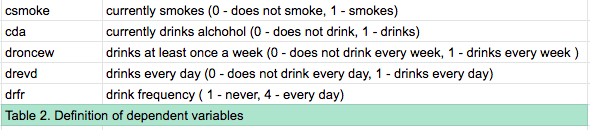

In [3]:
source('auxiliary/dgp.r')

In [4]:
head(X2)
head(Y2)

ffs,lfi,perf,age,returntosch,cwork2,hpw2,epw2,retedu,dipw2,treat,frpsmoke2,frpdrink2
finished,7.961287,1.31249877,13.51010,did not return,1,-13.211794,105.91797,314.9060,129.33639,control,1,3
did not finish,8.497254,0.98084045,14.16113,did not return,0,0.000000,0.00000,700.0204,71.88713,treated,2,1
finished,8.541361,1.65135519,14.30104,returned,0,0.000000,0.00000,1016.2650,61.09357,control,3,3
finished,8.294927,0.49217709,13.80841,returned,1,29.645630,89.69949,194.4458,100.85347,treated,3,1
did not finish,8.183552,0.09643178,14.11863,did not return,1,6.178245,186.33091,220.6582,46.02150,treated,4,4
did not finish,7.745777,2.61709784,13.97024,returned,0,0.000000,0.00000,1051.7857,10.15674,treated,2,3


csmoke2,cda2,droncew2,drevd2,drfr2
does not smoke,drinks,drinks once a week,does not dirnk every day,2
does not smoke,does not drink,does not drink once a week,does not dirnk every day,2
does not smoke,does not drink,drinks once a week,does not dirnk every day,2
does not smoke,does not drink,does not drink once a week,does not dirnk every day,2
does not smoke,drinks,does not drink once a week,does not dirnk every day,2
does not smoke,drinks,does not drink once a week,does not dirnk every day,1


In [5]:
head(X3)
head(Y3)

ffs,lfi,perf,age,treat,finhigh,yearssch,cwork3,hpw3,epw3,dipw3,patient3,frpsmoke3,frpdrink3,risk,smkbad,drinkbad
finished,8.398734,2.0122070,14.26416,treated,did not finish,12.231920,0,0.00000,0.0000,921.39280,2,4,4,1,3,2
did not finish,8.169036,-0.7936507,12.76151,treated,finished,10.459173,1,19.02444,959.2301,270.96029,1,5,5,2,4,3
finished,7.872459,2.5683169,15.41806,control,did not finish,9.056874,0,0.00000,0.0000,474.99524,3,3,4,3,4,3
did not finish,9.071263,2.4801904,15.67159,control,finished,11.793744,0,0.00000,0.0000,76.88214,2,3,4,1,3,4
did not finish,8.077903,2.9716776,14.03974,control,did not finish,8.026433,1,10.09851,722.0584,650.90870,1,4,3,2,3,2
did not finish,7.989921,0.5940554,14.41636,treated,finished,11.030726,0,0.00000,0.0000,94.90557,3,3,4,4,4,3


csmoke3,cda3,droncew3,drevd3,drfr3
smokes,drinks,drinks once a week,does not drink every day,2
does not smoke,drinks,does not drink once a week,does not drink every day,2
does not smoke,drinks,drinks once a week,does not drink every day,3
does not smoke,drinks,drinks once a week,does not drink every day,3
smokes,drinks,drinks once a week,does not drink every day,4
does not smoke,drinks,drinks once a week,drinks every day,3


In [6]:
print('Structure of the independent variables in the second round')
str(X2)
print('Structure of the independent variables in the third round')
str(X3)

[1] "Structure of the independent variables in the second round"
'data.frame':	2011 obs. of  13 variables:
 $ ffs        : Factor w/ 2 levels "did not finish",..: 2 1 2 2 1 1 1 1 2 1 ...
 $ lfi        : num  7.96 8.5 8.54 8.29 8.18 ...
 $ perf       : num  1.3125 0.9808 1.6514 0.4922 0.0964 ...
 $ age        : num  13.5 14.2 14.3 13.8 14.1 ...
 $ returntosch: Factor w/ 2 levels "did not return",..: 1 1 2 2 1 2 1 2 2 2 ...
 $ cwork2     : Factor w/ 2 levels "0","1": 2 1 1 2 2 1 1 2 1 1 ...
 $ hpw2       : num  -13.21 0 0 29.65 6.18 ...
 $ epw2       : num  105.9 0 0 89.7 186.3 ...
 $ retedu     : num  315 700 1016 194 221 ...
 $ dipw2      : num  129.3 71.9 61.1 100.9 46 ...
 $ treat      : Factor w/ 2 levels "control","treated": 1 2 1 2 2 2 1 2 2 1 ...
 $ frpsmoke2  : Factor w/ 5 levels "1","2","3","4",..: 1 2 3 3 4 2 2 5 2 1 ...
 $ frpdrink2  : Factor w/ 5 levels "1","2","3","4",..: 3 1 3 1 4 3 5 2 3 4 ...
[1] "Structure of the independent variables in the third round"
'data.frame':	2

## Tree 2nd round

### Currently drinks round 2

mtry = 3  OOB error = 44.32% 
Searching left ...
mtry = 2 	OOB error = 44.11% 
0.004807692 0.05 
Searching right ...
mtry = 6 	OOB error = 45.45% 
-0.02564103 0.05 


,mtry,OOBError
2.OOB,2,0.4410511
3.OOB,3,0.4431818
6.OOB,6,0.4545455


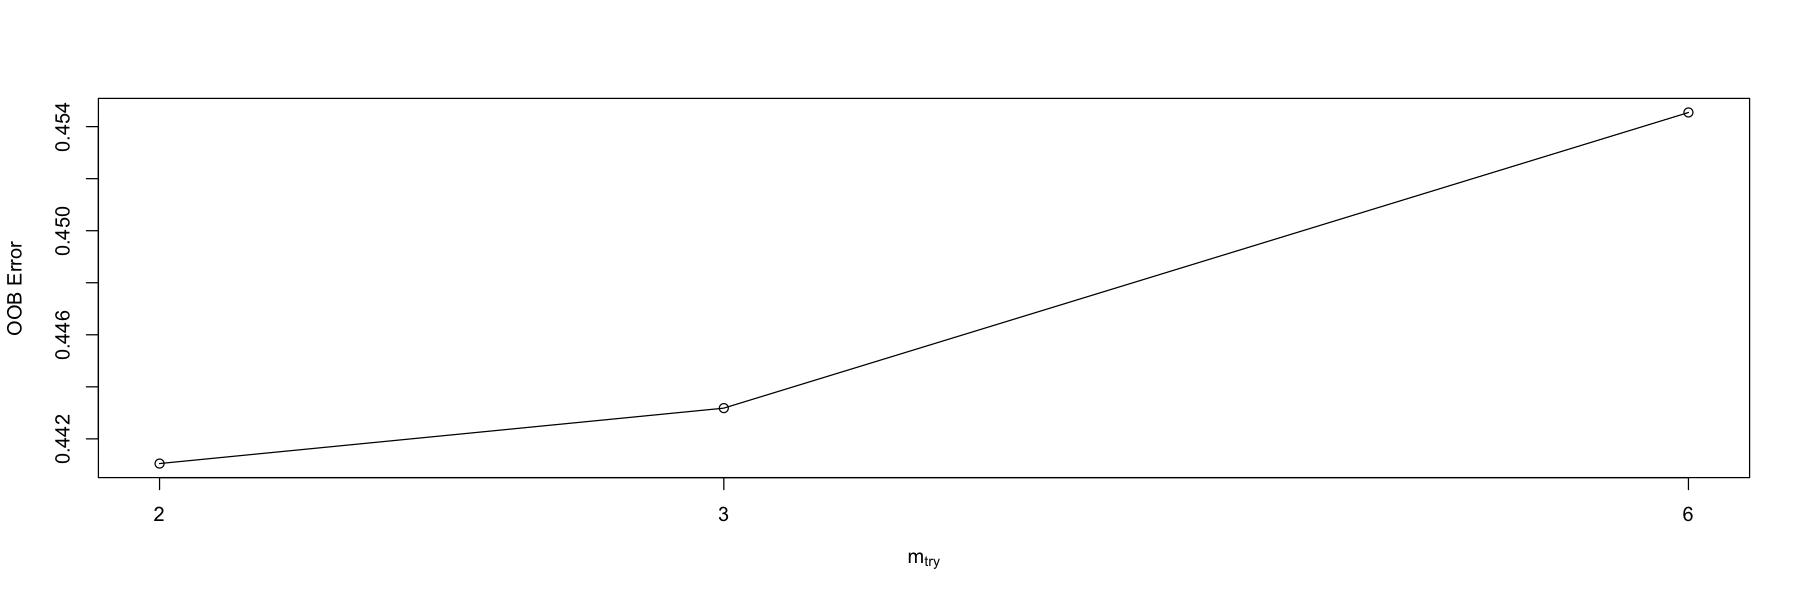

In [23]:
tuneRF(X2.train, Y2.train$cda2)


Call:
 randomForest(formula = Y2.train$cda2 ~ ., data = X2.train, proximity = T,      importance = T, metric = "Accuracy", nodes = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 42.19%
Confusion matrix:
               does not drink drinks class.error
does not drink             83    469   0.8496377
drinks                    125    731   0.1460280

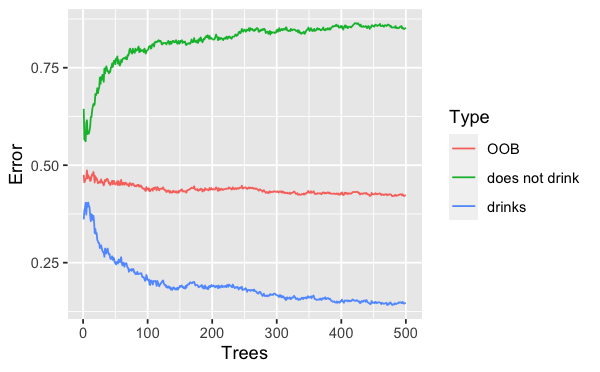

In [8]:
source('auxiliary/cda2.R')
rf.cda2
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=5, repr.plot.height=3)

In [115]:
importance(rf.cda2)

ERROR: Error in UseMethod("importance"): нет подходящего метода для 'importance' применяемого к объекту класса "c('randomForest.formula', 'randomForest')"



Call:
 randomForest(formula = Y2.train$cda2 ~ ., data = X2.train, proximity = T,      ntree = 1000, importance = T, mtry = 4) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 41.76%
Confusion matrix:
               does not drink drinks class.error
does not drink             84    468   0.8478261
drinks                    120    736   0.1401869

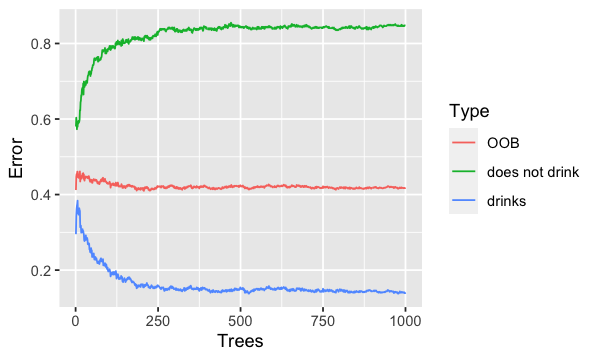

In [9]:
source('auxiliary/cda22.R')
rff.cda2

#To see if 1000 trees is enough for optimal classification, we can plot the error rates for ntree=1000
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=5, repr.plot.height=3.1)

In [10]:
## adding more trees did not help 

[1] 0.3920455 0.4154830 0.4169034 0.4261364 0.4275568 0.4225852 0.4311080
 [8] 0.4282670 0.4275568 0.4225852

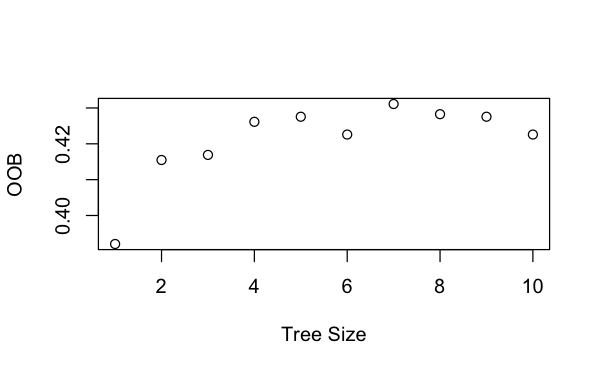

In [11]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=10)
for (i in 1:10) {
    temp.model<-randomForest(Y2.train$cda2~., data=X2.train, mtry=i, ntree=500)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=3, repr.plot.height=3)

In [12]:
rf.cda2.pred<-predict(rf.cda2, X2.test)
confusionMatrix(rf.cda2.pred, Y2.test$cda2)

Confusion Matrix and Statistics

                Reference
Prediction       does not drink drinks
  does not drink             28     41
  drinks                    205    329
                                          
               Accuracy : 0.592           
                 95% CI : (0.5516, 0.6316)
    No Information Rate : 0.6136          
    P-Value [Acc > NIR] : 0.8704          
                                          
                  Kappa : 0.0108          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.12017         
            Specificity : 0.88919         
         Pos Pred Value : 0.40580         
         Neg Pred Value : 0.61610         
             Prevalence : 0.38640         
         Detection Rate : 0.04643         
   Detection Prevalence : 0.11443         
      Balanced Accuracy : 0.50468         
                                          
       

,does not drink,drinks
ffs,-0.9248520,-0.9248520
lfi,0.7130563,0.7130563
perf,0.4228134,0.4228134
age,-2.4249623,-2.4249623
returntosch,-0.9924015,-0.9924015
cwork2,0.1889704,0.1889704
hpw2,-0.6336935,-0.6336935
epw2,-1.0311768,-1.0311768
retedu,-2.1018020,-2.1018020
dipw2,-1.5453470,-1.5453470


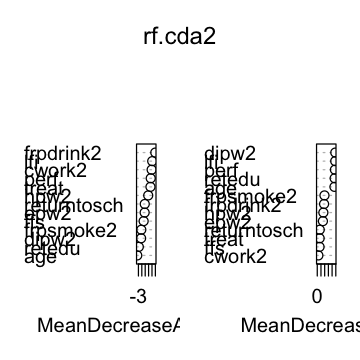

In [13]:
varImp(rf.cda2)
varImpPlot(rf.cda2)
options(repr.plot.width=15, repr.plot.height=5)

### Currently smokes round 2 


Call:
 randomForest(formula = Y2.train$csmoke2 ~ ., data = X2.train,      proximity = T, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.97%
Confusion matrix:
               does not smoke smokes class.error
does not smoke           1911      0           0
smokes                    100      0           1

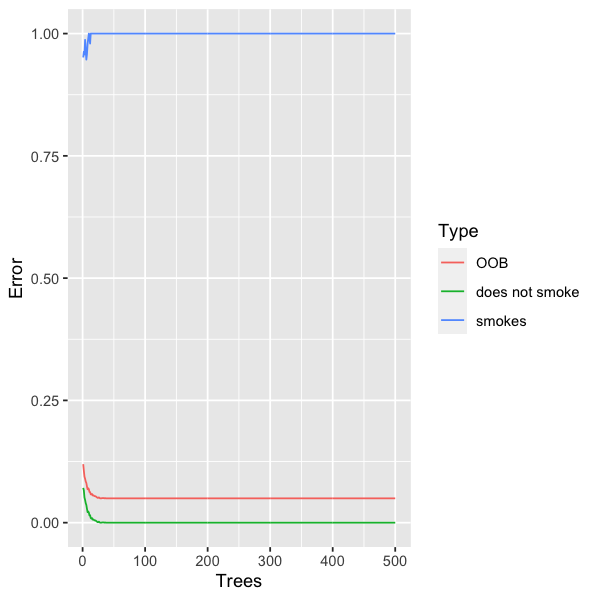

In [111]:
rf.csmoke2<-randomForest(formula=Y2.train$csmoke2~., data=X2.train,proximity=T, importance=T)
#ntree=500,mtry=3,
rf.csmoke2
#rf.cda2.pred<-predict(rf.cda2,round2.x.test )
#rf.cda2$err.rate

#To see if 500 trees is enough for optimal classification, we can plot the error rates
oob.error.data<-data.frame( 
    Trees=rep(1:nrow(rf.csmoke2$err.rate), times=3),
    Type=rep(c("OOB", "does not smoke", "smokes"), each=nrow(rf.csmoke2$err.rate)),
    Error=c(rf.csmoke2$err.rate[,"OOB"],
           rf.csmoke2$err.rate[,"does not smoke"],
           rf.csmoke2$err.rate[,'smokes']))
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=5, repr.plot.height=3)

In [109]:
rff.csmoke2<-randomForest(formula=Y2.train$csmoke2~., data=X2.train,proximity=T, ntree=1000, importance=T)
#,mtry=3,
rff.csmoke2

#To see if 1000 trees is enough for optimal classification, we can plot the error rates
#oob.error.data<-data.frame( 
#    Trees=rep(1:nrow(rff.csmoke2$err.rate), times=3),
#    Type=rep(c("OOB", "does not smoke", "smokes"), each=nrow(rff.csmoke2$err.rate)),
#    Error=c(rff.csmoke2$err.rate[,"OOB"],
#           rff.csmoke2$err.rate[,"does not smoke"],
#           rff.csmoke2$err.rate[,'smokes']))
#ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
#options(repr.plot.width=5, repr.plot.height=3.2)


Call:
 randomForest(formula = Y2.train$csmoke2 ~ ., data = X2.train,      proximity = T, ntree = 1000, importance = T) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.97%
Confusion matrix:
               does not smoke smokes class.error
does not smoke           1911      0           0
smokes                    100      0           1

[1] 0.04972650 0.04972650 0.04972650 0.05022377 0.05022377 0.05022377
 [7] 0.05022377 0.05072103 0.05022377 0.05022377

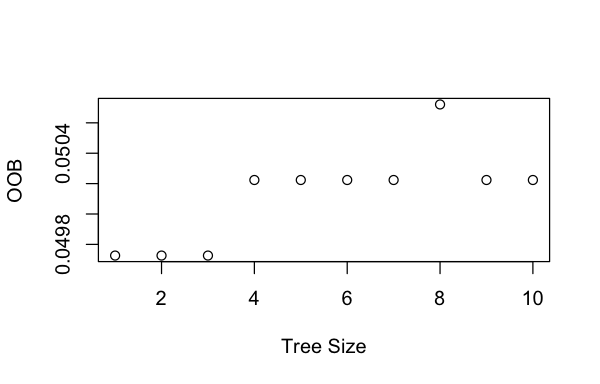

In [110]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=10)
for (i in 1:10) {
    temp.model<-randomForest(Y2.train$csmoke2~., data=X2.train, mtry=i, ntree=500)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=5)

### Droncew - Drinks at least once a week round 2


Call:
 randomForest(formula = Y2.train$droncew2 ~ ., data = X2.train,      proximity = T, importance = T, mtry = 4) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 19.24%
Confusion matrix:
                           does not drink once a week drinks once a week
does not drink once a week                       1622                  7
drinks once a week                                380                  2
                           class.error
does not drink once a week 0.004297115
drinks once a week         0.994764398

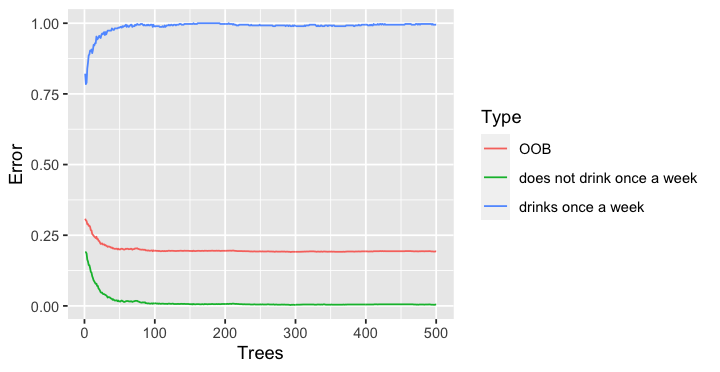

In [64]:
rf.droncew2<-randomForest(formula=Y2.train$droncew2~., data=X2.train,proximity=T, importance=T, mtry=4)
#ntree=500,mtry=3,
rf.droncew2
#rf.cda2.pred<-predict(rf.cda2,round2.x.test )
#rf.cda2$err.rate

#To see if 500 trees is enough for optimal classification, we can plot the error rates
oob.error.data<-data.frame( 
    Trees=rep(1:nrow(rf.droncew2$err.rate), times=3),
    Type=rep(c("OOB", "does not drink once a week", "drinks once a week"), each=nrow(rf.droncew2$err.rate)),
    Error=c(rf.droncew2$err.rate[,"OOB"],
           rf.droncew2$err.rate[,"does not drink once a week"],
           rf.droncew2$err.rate[,'drinks once a week']))
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=6, repr.plot.height=3.1)

[1] 0.1899552 0.1909498 0.1919443 0.1909498 0.1959224 0.1959224 0.1944306
 [8] 0.1944306 0.1969170 0.1964197

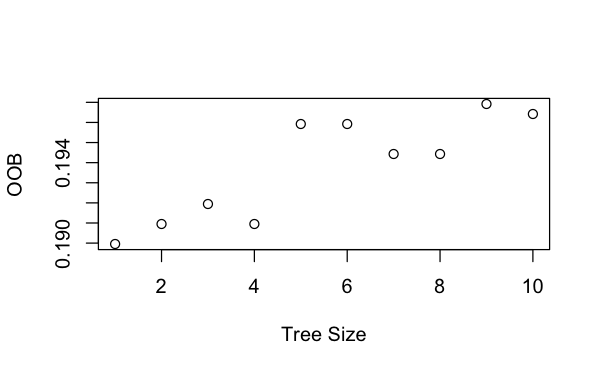

In [62]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=10)
for (i in 1:10) {
    temp.model<-randomForest(Y2.train$droncew2~., data=X2.train, mtry=i, ntree=500)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=5)

### Drevd Drinks every day round 2 

In [65]:
rf.drevd2<-randomForest(formula=Y2.train$drevd2~., data=X2.train,proximity=T, importance=T)
#ntree=500,mtry=3,
rf.drevd2
#rf.cda2.pred<-predict(rf.cda2,round2.x.test )
#rf.cda2$err.rate

#To see if 500 trees is enough for optimal classification, we can plot the error rates
oob.error.data<-data.frame( 
    Trees=rep(1:nrow(rf.drevd2$err.rate), times=3),
    Type=rep(c("OOB", "does not drink every day", "drinks every day"), each=nrow(rf.drevd2$err.rate)),
    Error=c(rf.drevd2$err.rate[,"OOB"],
           rf.drevd2$err.rate[,"does not drink every day"],
           rf.drevd2$err.rate[,'drinks every day']))
#ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
#options(repr.plot.width=5, repr.plot.height=3.1)


Call:
 randomForest(formula = Y2.train$drevd2 ~ ., data = X2.train,      proximity = T, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.99%
Confusion matrix:
                         does not dirnk every day drinks every day class.error
does not dirnk every day                     1971                0           0
drinks every day                               40                0           1

ERROR: Error in rf.drevd2$err.rate[, "does not drink every day"]: подгруппа выходит за пределы


In [25]:
rf.drfr2<-randomForest(formula=Y2.train$drfr2~., data=X2.train,proximity=T, importance=T)
#ntree=500,mtry=3,
rf.drfr2


Call:
 randomForest(formula = Y2.train$drfr2 ~ ., data = X2.train, proximity = T,      importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 43.68%
Confusion matrix:
  1   2  3 4 class.error
1 2 246  7 0  0.99215686
2 5 778 16 0  0.02628285
3 2 320 13 0  0.96119403
4 0  19  0 0  1.00000000

[1] 0.4325284 0.4360795 0.4410511 0.4417614 0.4453125 0.4531250 0.4488636
 [8] 0.4460227 0.4446023 0.4524148

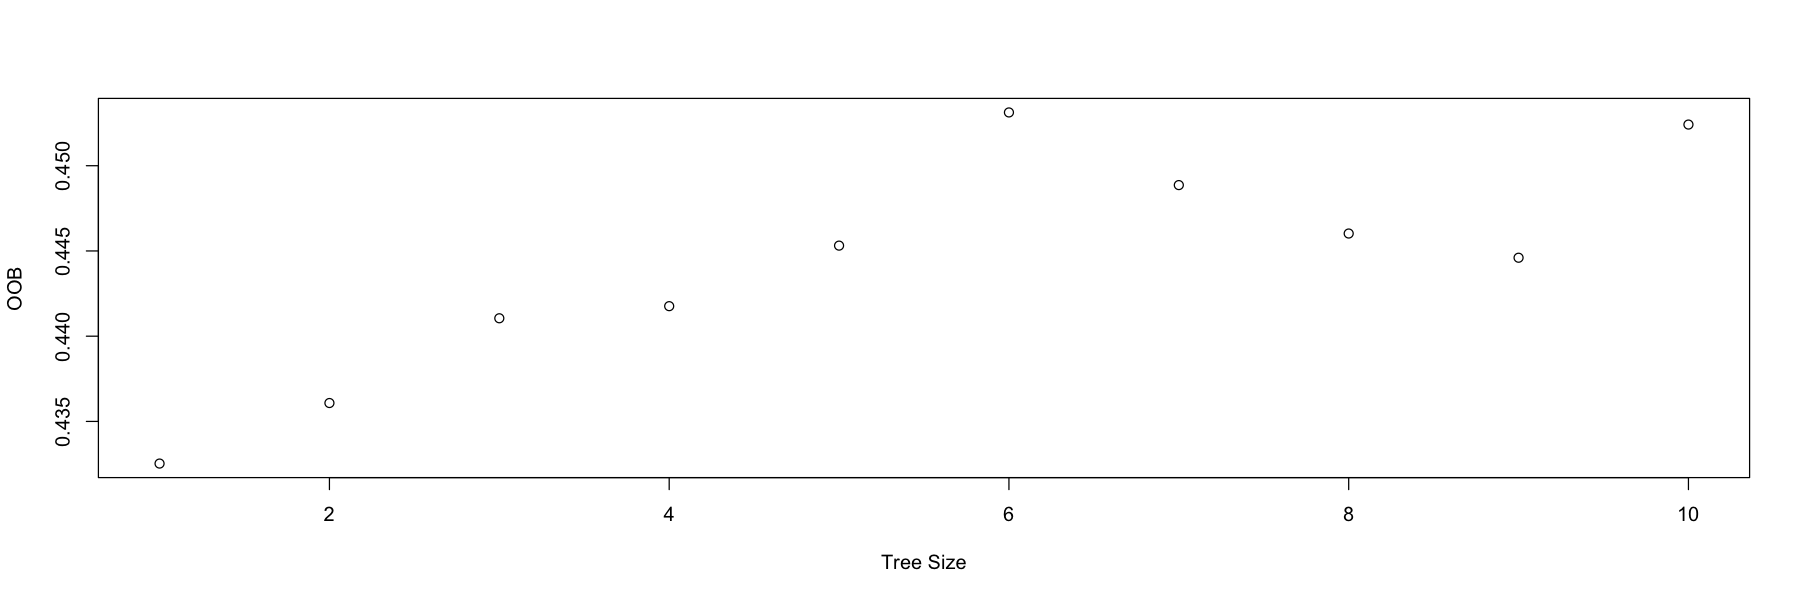

In [26]:
oob.values<-vector(length=10)
for (i in 1:10) {
    temp.model<-randomForest(Y2.train$drfr2~., data=X2.train, mtry=i, ntree=500)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=5)

## Tree 3rd round

In [74]:
rf.cda3<-randomForest(formula=Y3.train$cda3~., 
             data=X3.train, ntree=500, mtry=3, importance=T)
rf.cda3
#rf.cda3.pred<-predict(rf.cda3,round3.data.test )



Call:
 randomForest(formula = Y3.train$cda3 ~ ., data = X3.train, ntree = 500,      mtry = 3, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 27%
Confusion matrix:
               does not drink drinks class.error
does not drink              8    535 0.985267035
drinks                      8   1460 0.005449591

In [36]:
?data.frame

## Results

## OLS Results for the third round

In [15]:
######## Currently smokes
ols.csmoke3<-lm(csmoke3~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
                data=round3.data.train)
ols.csmoke3.pred<-predict(ols.csmoke3, round3.data.test)
MSE(ols.csmoke3.pred, round3.data.test$csmoke3)
####### Currently drinks
ols.cda3<-lm(cda3~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
             data=round3.data.train)
ols.cda3.pred<-predict(ols.cda3, round3.data.test)
MSE(ols.cda3.pred, round3.data.test$cda3)
####### Drinks once a week
ols.droncew3<-lm(droncew3~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
                 data=round3.data.train)
ols.droncew3.pred<-predict(ols.droncew3, round3.data.test)
MSE(ols.droncew3.pred, round3.data.test$droncew3)
####### Drinks every day 
ols.drevd3<-lm(drevd3~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
               data=round3.data.train)
ols.drevd3.pred<-predict(ols.drevd3, round3.data.test)
MSE(ols.drevd3.pred, round3.data.test$drevd3)
####### Drinking frequency 
ols.drfr3<-lm(drfr3~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
              data=round3.data.train)
ols.drfr3.pred<-predict(ols.drfr3, round3.data.test)
MSE(ols.drfr3.pred, round3.data.test$drfr3)
###### Smoking is bad
ols.smkbad<-lm(smkbad~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
               data=round3.data.train)
ols.smkbad.pred<-predict(ols.smkbad, round3.data.test)
MSE(ols.smkbad.pred, round3.data.test$smkbad)
###### Drinking is bad
ols.drinkbad<-lm(drinkbad~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
                 data=round3.data.train)
ols.drinkbad.pred<-predict(ols.drinkbad, round3.data.test)
MSE(ols.drinkbad.pred, round3.data.test$drinkbad)



Warning message in predict.lm(ols.csmoke3, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.1138303

Warning message in predict.lm(ols.cda3, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.1980475

Warning message in predict.lm(ols.droncew3, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.2496061

Warning message in predict.lm(ols.drevd3, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.11389

Warning message in predict.lm(ols.drfr3, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.5449377

Warning message in predict.lm(ols.smkbad, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.4083425

Warning message in predict.lm(ols.drinkbad, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.3673549

## OLS Results for the second round

In [49]:
######## Currently smokes
ols.csmoke2<-lm(round2.y.train$csmoke2~., data=round2.x.train)
ols.csmoke2.pred<-predict(ols.csmoke2, round2.x.test)
MSE(ols.csmoke2.pred, round2.y.test$csmoke2)
####### Currently drinks
ols.cda2<-lm(cda2~., data=round2.x.train)
ols.cda2.pred<-predict(ols.cda2, round2.x.test)
MSE(ols.cda2.pred, round2.y.test$cda2)
####### Drinks once a week
ols.droncew2<-lm(droncew2~ffs+lfi+perf+age+returntosch+cwork2+hpw2+epw2+dipw2+treat+frpsmoke2+frpdrink2, 
                 data=round2.data.train)
ols.droncew2.pred<-predict(ols.droncew2, round2.data.test)
MSE(ols.droncew2.pred, round2.data.test$droncew2)
####### Drinks every day 
ols.drevd2<-lm(drevd2~ffs+lfi+perf+age+returntosch+cwork2+hpw2+epw2+dipw2+treat+frpsmoke2+frpdrink2, 
               data=round2.data.train)
ols.drevd2.pred<-predict(ols.drevd2, round2.data.test)
MSE(ols.drevd2.pred, round2.data.test$drevd2)
####### Drinking frequency 
ols.drfr2<-lm(drfr2~ffs+lfi+perf+age+returntosch+cwork2+hpw2+epw2+dipw2+treat+frpsmoke2+frpdrink2, 
              data=round2.data.train)
ols.drfr2.pred<-predict(ols.drfr2, round2.data.test)
MSE(ols.drfr2.pred, round2.data.test$drfr2)


 

Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor lfi has new levels 7.07492783422276, 7.13106968431062, 7.13205824154341, 7.23252878603557, 7.2413416263179, 7.24701310825938, 7.25739301431912, 7.30718267554453, 7.32075402047526, 7.32504448869126, 7.34004247575345, 7.34114304106801, 7.34149385372814, 7.34847484165904, 7.35314290527505, 7.37031709237462, 7.38929897330037, 7.39612909933856, 7.40047848209824, 7.40715218443826, 7.41115646369178, 7.42100588515437, 7.42239194153543, 7.43479047319743, 7.44236526145253, 7.44700916562583, 7.4477273140587, 7.44867165481766, 7.45271990189723, 7.46260371443999, 7.47029626152457, 7.47171621458058, 7.4765652964206, 7.48901487959909, 7.48933244518296, 7.49249424970114, 7.49434019491703, 7.49652227506641, 7.49717190606557, 7.50103977852013, 7.50240640479962, 7.50293941242345, 7.51258877991813, 7.52021294936381, 7.52270401098968, 7.52377020591535, 7.52463846439885, 7.52962041472542, 7.53184332580563, 7.53516908589326, 7.54175563649529, 7.5424028342884, 7.54543149652121, 7.54625272335826, 7.54828804424362, 7.54972899432239, 7.557381436018, 7.5593191169025, 7.56867445353484, 7.56965867359895, 7.57074281851423, 7.57106432927872, 7.57846025495087, 7.57991259888954, 7.58079473722974, 7.58271212842904, 7.58335684581363, 7.58455348551897, 7.59041446201156, 7.59143936674955, 7.59238299984759, 7.59351954294309, 7.59573993573346, 7.59690456035133, 7.59870773173582, 7.60051139325767, 7.60362324917029, 7.60809942931269, 7.60841742129848, 7.60904345905921, 7.60944549583001, 7.61062254297019, 7.61067885910135, 7.6183840420111, 7.61839745112739, 7.61897745494672, 7.61925965983996, 7.61933155195762, 7.62208279023902, 7.62332198039228, 7.62369467612066, 7.63013011852402, 7.63170313223744, 7.63175123104522, 7.63267340551232, 7.6345222948907, 7.63565213143723, 7.63891845054899, 7.64027488092382, 7.64145555885806, 7.64162765667701, 7.64909206555187, 7.64980464615161, 7.65157857633186, 7.65455624037449, 7.65780808442237, 7.65842084686476, 7.66541383674181, 7.66779303128091, 7.66786763004229, 7.66927422335244, 7.66940546216555, 7.67010499523372, 7.67159760218867, 7.67260971121892, 7.67591049919323, 7.67839912259722, 7.67910586907515, 7.68110887213741, 7.68133190261385, 7.68216401771426, 7.68287530684093, 7.68304870606374, 7.68362555324434, 7.68559656075114, 7.6860625683752, 7.6860934431877, 7.68646567815459, 7.68863483604927, 7.6897898374511, 7.6912560322725, 7.69321800579554, 7.69321969675443, 7.69476286482448, 7.69486623967813, 7.69562578319189, 7.69854972622803, 7.70146348575398, 7.70280787266, 7.70400184803614, 7.70435346871782, 7.70755625322128, 7.70831447625625, 7.70867023482045, 7.70886866353199, 7.70903079049215, 7.71121345453335, 7.71286179928931, 7.71329700439846, 7.71468821302462, 7.7162017424341, 7.71715411432648, 7.71809671281106, 7.71884416288025, 7.72234556736795, 7.72519209204216, 7.7253106220637, 7.72690172733576, 7.72701218158366, 7.727812914158, 7.72834941310272, 7.73023485846728, 7.73209357647244, 7.73501162389568, 7.73569840856752, 7.73707596944173, 7.73896545024029, 7.74179348038934, 7.74179414815278, 7.74224159185382, 7.74264378071289, 7.74349459024772, 7.74372039798104, 7.74373555854928, 7.74473823147332, 7.7450832418767, 7.74581379704276, 7.74821831649385, 7.74925645432909, 7.74933145540486, 7.75079401528758, 7.75317702443601, 7.75350753348224, 7.75352624911638, 7.75454605818949, 7.75464419971557, 7.7589523222195, 7.7596907618274, 7.76101947202626, 7.76228143341399, 7.76232136316788, 7.76234421588414, 7.76308124840658, 7.76450383963174, 7.76460029965344, 7.76482803475623, 7.76604962206374, 7.76755060007163, 7.76846197062095, 7.76855547514383, 7.76976716344827, 7.77057676271846, 7.77198363681963, 7.77214712949176, 7.77252839603555, 7.77266953629616, 7.7731720557128, 7.77355591416704, 7.77395911100165, 7.7757883496394, 7.77597736957168, 7.77781982628319, 7.7806784200395, 7.78333444318508, 7.78339808589218, 7.78460400571886, 7.78490823695461, 7.78521574721089, 7.78701471088647, 7.78910535496829, 7.79003310626525, 7.79077982895323, 7.79100469408422, 7.79252926071019, 7.79264837562529, 7.79291662735846, 7.79303207325544, 7.79320773345437, 7.79580965239288, 7.79596488090817, 7.79701758983043, 7.79707803534699, 7.7979505195266, 7.7983138956221, 7.79883108929532, 7.79889932294907, 7.80028470515087, 7.80190782175325, 7.80407736905878, 7.80511397721952, 7.80544596990404, 7.80665854911942, 7.80839155890413, 7.80937708101069, 7.8138465913519, 7.81551373171084, 7.81618315144407, 7.81779086204906, 7.8180324849101, 7.81831807590124, 7.81928897359308, 7.82065252807115, 7.82094628835959, 7.82240022374007, 7.82305614187079, 7.8230714120216, 7.82311836696673, 7.82351107092771, 7.82385039610925, 7.82420618075364, 7.82443204053378, 7.82564789659678, 7.82575828706306, 7.82609875060712, 7.82613803637563, 7.82634874228246, 7.82672040220037, 7.8268994250446, 7.82749285705143, 7.82871044816373, 7.82920030355154, 7.83006741414529, 7.83016699018224, 7.83018814244669, 7.83113361626803, 7.83120160905234, 7.83154574834115, 7.83182848606879, 7.83223236773023, 7.8327973599166, 7.8330550657915, 7.8331073920518, 7.83313290273878, 7.8332175690471, 7.83366439990418, 7.83429203228367, 7.83447625510597, 7.83488734119728, 7.83538861771254, 7.83554890811911, 7.8378376199683, 7.83826990004561, 7.83921980030905, 7.83992005870492, 7.84043039121183, 7.84077190084156, 7.84077830517063, 7.84149234045392, 7.84382960409932, 7.84418804118561, 7.84425490493274, 7.84532523954727, 7.84586423515849, 7.8467820273378, 7.84733692902822, 7.84760280682879, 7.84788997533429, 7.8496569088693, 7.85218976512716, 7.85300931780193, 7.85456070985878, 7.85474429095281, 7.85492853383645, 7.85510497908563, 7.85670116642856, 7.85711451057077, 7.85778850528331, 7.85846183242227, 7.85878449904305, 7.86011758713125, 7.86091621211602, 7.86130070006872, 7.86136069881297, 7.86302636346799, 7.86339407252687, 7.86457719018104, 7.86475710244832, 7.86486564795593, 7.86497440646517, 7.86529968509016, 7.86624923052372, 7.86683019159682, 7.86718313116036, 7.86728288393042, 7.86787553617937, 7.86820406851726, 7.86836723592313, 7.86870131752656, 7.86894496889937, 7.86911477061625, 7.8695036984678, 7.86997561168311, 7.87018680390734, 7.87261289261414, 7.87279235774606, 7.87327276369109, 7.87430775776779, 7.87436824183798, 7.87470004790929, 7.87545880089663, 7.87575102491045, 7.87647748723744, 7.87801118056875, 7.8781189929006, 7.87819416496822, 7.87916758264484, 7.87994181496399, 7.88010536367011, 7.88195414399537, 7.88213347045038, 7.88243606724674, 7.88294951915863, 7.88474817575303, 7.8847860367365, 7.88518316469136, 7.88565254563596, 7.8867949830541, 7.88728805190272, 7.88814865080244, 7.88855296775482, 7.88940504055901, 7.89021516363949, 7.89031852521937, 7.890976127509, 7.89321432823632, 7.89348368190558, 7.8945564089584, 7.89533737728785, 7.89570793261541, 7.89588925984456, 7.8960315740714, 7.89605318698952, 7.89678892081936, 7.89696768812291, 7.89705902427276, 7.8975273474264, 7.89892278816361, 7.89965706908, 7.90072602980132, 7.90183850677564, 7.90221228329853, 7.90222295642327, 7.90237288335221, 7.90330045891123, 7.9038385013279, 7.90477095440455, 7.90492417822818, 7.905639109018, 7.90617085139636, 7.90634589645815, 7.90637167029871, 7.90762945936087, 7.9076799485927, 7.90801944466797, 7.90921670944795, 7.90951467572672, 7.91014980662685, 7.91038608448414, 7.91094695796443, 7.91105977221006, 7.91133126467799, 7.91231679060183, 7.91375655405287, 7.91442381802889, 7.91540240160844, 7.91581041664624, 7.91603535960442, 7.91738257467181, 7.91877614843641, 7.91985299495326, 7.92085971700053, 7.92108360445958, 7.92218659306506, 7.92231891216581, 7.92366287792212, 7.92454933009549, 7.92767901084398, 7.92772143765385, 7.9284961672518, 7.9287856497812, 7.92909316745177, 7.93021958383156, 7.93121141558151, 7.93165989617681, 7.93178995567093, 7.93203792974179, 7.93246770301407, 7.93268219466719, 7.93368455045876, 7.93376356681851, 7.93387586828453, 7.93430519699881, 7.9349420161072, 7.93503070417432, 7.93564458833941, 7.9358706417561, 7.93599414700284, 7.93711184729142, 7.93743628585972, 7.93788476997254, 7.93802692971993, 7.93833885686776, 7.93852366145206, 7.93914644488335, 7.9417889280516, 7.94235408316943, 7.94243889177588
